# StreetName

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, LineString, MultiLineString

## Shadows data: Spring Sunrise
## building_id: 120 (street segments: 2021_49, 1577_11)

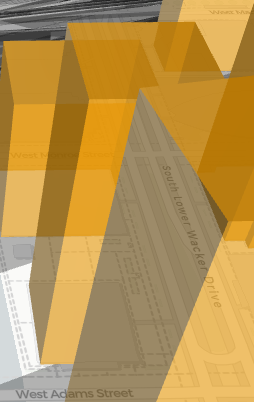

Area of the Geometry: 1.1750864731914911e-05 square units


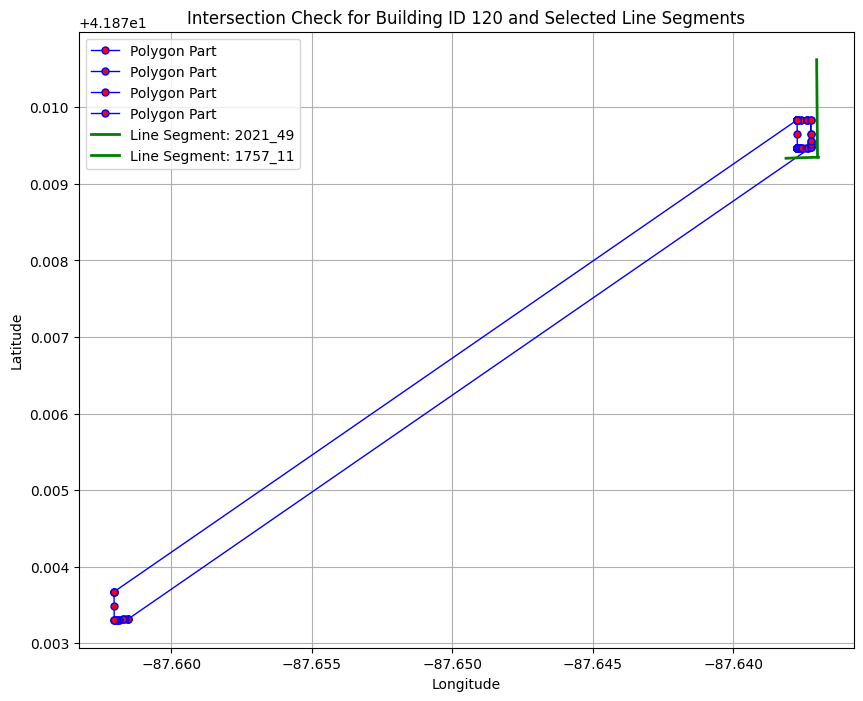

In [8]:
# Load the GeoJSON and CSV files
shadows = gpd.read_file(r'C:\Users\DAYE\shadows_street_info_Spring_Sunrise2.geojson')
transportation = pd.read_csv(r'C:\Users\DAYE\Chicago_Streets_with_street_segment_id.csv')

# Ensure 'geometry' column is present and convert to GeoDataFrame
if 'geometry' in transportation.columns:
    transportation['geometry'] = gpd.GeoSeries.from_wkt(transportation['geometry'])
else:
    raise ValueError("The transportation data does not have a 'geometry' column.")

transportation = gpd.GeoDataFrame(transportation, geometry='geometry', crs="EPSG:4326")

# Convert CRS to match (if necessary)
shadows = shadows.to_crs(transportation.crs)

# Step 1: Find the specific polygon in shadows for building_id = 120
building_id = 120
building_type = "ground"
shadow_row = shadows[(shadows['building_id'] == building_id) & (shadows['type'] == building_type)]

# Step 2: Retrieve the polygon or multipolygon and calculate its area if applicable
if not shadow_row.empty:
    geometry = shadow_row.iloc[0].geometry

    if isinstance(geometry, Polygon) or isinstance(geometry, MultiPolygon):
        # Calculate the area for the entire geometry (Polygon or MultiPolygon)
        area = geometry.area
        print(f"Area of the Geometry: {area} square units")

        # Step 3: Use the provided street_segment_id1 and street_segment_id2
        street_segment_id1 = "2021_49"
        street_segment_id2 = "1757_11"

        # Retrieve and plot the specified line segments
        selected_segments = transportation[transportation['street_segment_id'].isin([street_segment_id1, street_segment_id2])]

        if not selected_segments.empty:
            fig, ax = plt.subplots(figsize=(10, 8))

            # Plot the polygon or multipolygon
            if isinstance(geometry, Polygon):
                x, y = geometry.exterior.xy
                ax.plot(x, y, color='blue', linestyle='-', linewidth=1, marker='o', markersize=5, markerfacecolor='red', label='Polygon')

            elif isinstance(geometry, MultiPolygon):
                for polygon in geometry.geoms:
                    x, y = polygon.exterior.xy
                    ax.plot(x, y, color='blue', linestyle='-', linewidth=1, marker='o', markersize=5, markerfacecolor='red', label='Polygon Part')

            # Plot the line segments
            for _, row in selected_segments.iterrows():
                if isinstance(row.geometry, MultiLineString):
                    for line in row.geometry.geoms:
                        line_x, line_y = line.xy
                        ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=2, label=f'Line Segment: {row["street_segment_id"]}')
                elif isinstance(row.geometry, LineString):
                    line_x, line_y = row.geometry.xy
                    ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=2, label=f'Line Segment: {row["street_segment_id"]}')

            # Add labels and grid
            plt.title(f'Intersection Check for Building ID {building_id} and Selected Line Segments')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"No matching street_segment_ids {street_segment_id1}, {street_segment_id2} found in transportation file.")
    else:
        print("The geometry is neither Polygon nor MultiPolygon.")
else:
    print("No matching row found for the specified building_id and type.")


## Shadows data: Spring Sunset
## building_id: 120 (street segments: 2021_49, 1577_11)

Retrieved street_segment_id1: 2021_49, street_segment_id2: 1757_11
Area of the Geometry: 2.6651651376766672e-05 square units
Yes: The line segments intersect with the polygon parts.


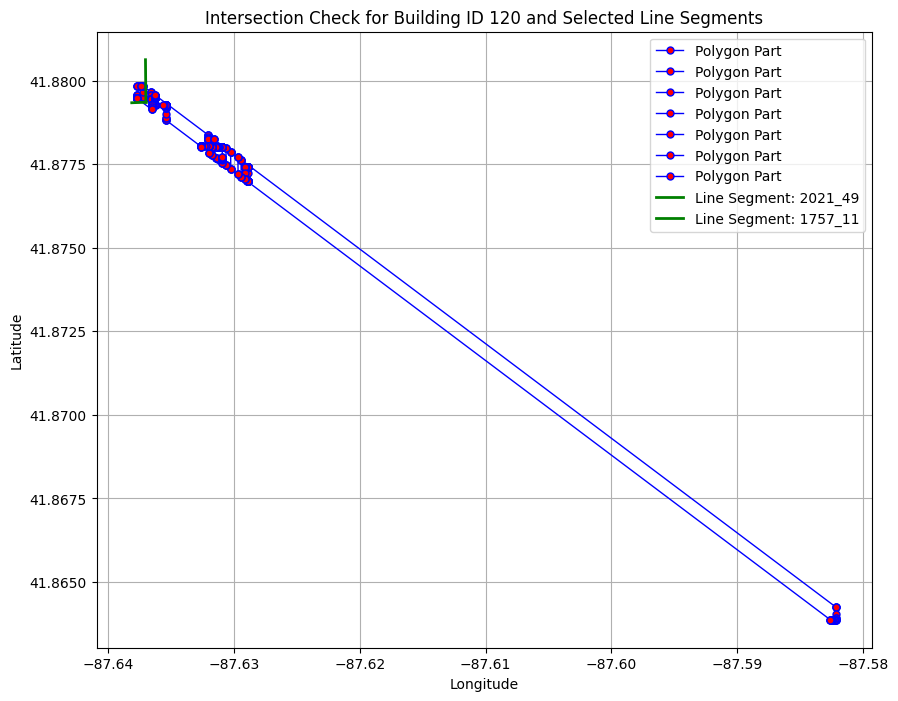

In [19]:
# Load the GeoJSON and CSV files
shadows = gpd.read_file(r'C:\Users\DAYE\shadows_street_info_Spring_Sunset2.geojson')
transportation = pd.read_csv(r'C:\Users\DAYE\Chicago_Streets_with_street_segment_id.csv')
segments = gpd.read_file(r'C:\Users\DAYE\buildings_with_segments2.geojson')  # New file to find segment IDs

# Ensure 'geometry' column is present and convert to GeoDataFrame
if 'geometry' in transportation.columns:
    transportation['geometry'] = gpd.GeoSeries.from_wkt(transportation['geometry'])
else:
    raise ValueError("The transportation data does not have a 'geometry' column.")

transportation = gpd.GeoDataFrame(transportation, geometry='geometry', crs="EPSG:4326")

# Convert CRS to match (if necessary)
shadows = shadows.to_crs(transportation.crs)
segments = segments.to_crs(transportation.crs)  # Ensure same CRS as transportation

# Step 1: Find the specific polygon in shadows for a given building_id
building_id = 120  # Input building_id
building_type = "ground"
shadow_row = shadows[(shadows['building_id'] == building_id) & (shadows['type'] == building_type)]

# Step 2: Retrieve street_segment_id1 and street_segment_id2 from the segments file
segment_row = segments[segments['building_id'] == building_id]
if not segment_row.empty:
    street_segment_id1 = segment_row.iloc[0]['street_segment_id1']
    street_segment_id2 = segment_row.iloc[0]['street_segment_id2']
    print(f"Retrieved street_segment_id1: {street_segment_id1}, street_segment_id2: {street_segment_id2}")
else:
    raise ValueError(f"Building ID {building_id} not found in the segments file.")

# Step 3: Retrieve the polygon or multipolygon and calculate its area if applicable
if not shadow_row.empty:
    geometry = shadow_row.iloc[0].geometry

    if isinstance(geometry, Polygon) or isinstance(geometry, MultiPolygon):
        # Calculate the area for the entire geometry (Polygon or MultiPolygon)
        area = geometry.area
        print(f"Area of the Geometry: {area} square units")

        # Retrieve and plot the specified line segments
        selected_segments = transportation[transportation['street_segment_id'].isin([street_segment_id1, street_segment_id2])]

        intersection_found = False  # Initialize intersection flag

        if not selected_segments.empty:
            for _, row in selected_segments.iterrows():
                if isinstance(row.geometry, MultiLineString):
                    for line in row.geometry.geoms:
                        if geometry.intersects(line):
                            intersection_found = True
                            break
                elif isinstance(row.geometry, LineString):
                    if geometry.intersects(row.geometry):
                        intersection_found = True
                        break

            # Update the result based on the intersection
            if intersection_found:
                print("Yes: The line segments intersect with the polygon parts.")
            else:
                print("No: The line segments do not intersect with the polygon parts.")

            # Plot the results
            fig, ax = plt.subplots(figsize=(10, 8))

            # Plot the polygon or multipolygon
            if isinstance(geometry, Polygon):
                x, y = geometry.exterior.xy
                ax.plot(x, y, color='blue', linestyle='-', linewidth=1, marker='o', markersize=5, markerfacecolor='red', label='Polygon')

            elif isinstance(geometry, MultiPolygon):
                for polygon in geometry.geoms:
                    x, y = polygon.exterior.xy
                    ax.plot(x, y, color='blue', linestyle='-', linewidth=1, marker='o', markersize=5, markerfacecolor='red', label='Polygon Part')

            # Plot the line segments
            for _, row in selected_segments.iterrows():
                if isinstance(row.geometry, MultiLineString):
                    for line in row.geometry.geoms:
                        line_x, line_y = line.xy
                        ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=2, label=f'Line Segment: {row["street_segment_id"]}')
                elif isinstance(row.geometry, LineString):
                    line_x, line_y = row.geometry.xy
                    ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=2, label=f'Line Segment: {row["street_segment_id"]}')

            # Add labels and grid
            plt.title(f'Intersection Check for Building ID {building_id} and Selected Line Segments')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"No matching street_segment_ids {street_segment_id1}, {street_segment_id2} found in transportation file.")
    else:
        print("The geometry is neither Polygon nor MultiPolygon.")
else:
    print("No matching row found for the specified building_id and type.")


# Add a shadow_intersection column for every street segments

In [32]:
# Load the GeoJSON and CSV files
shadows = gpd.read_file(r'C:\Users\DAYE\shadows_street_info_Winter_Sunset2.geojson')
transportation = pd.read_csv(r'C:\Users\DAYE\Chicago_Streets_with_street_segment_id.csv')
segments = gpd.read_file(r'C:\Users\DAYE\buildings_with_segments2.geojson')  # New file to find segment IDs

# Ensure 'geometry' column is present and convert to GeoDataFrame
if 'geometry' in transportation.columns:
    transportation['geometry'] = gpd.GeoSeries.from_wkt(transportation['geometry'])
else:
    raise ValueError("The transportation data does not have a 'geometry' column.")

transportation = gpd.GeoDataFrame(transportation, geometry='geometry', crs="EPSG:4326")

# Convert CRS to match (if necessary)
shadows = shadows.to_crs(transportation.crs)
segments = segments.to_crs(transportation.crs)  # Ensure same CRS as transportation

# Step 1: Validate geometries and fix invalid ones
shadows["geometry"] = shadows["geometry"].apply(lambda geom: geom.buffer(0) if geom and not geom.is_valid else geom)
transportation["geometry"] = transportation["geometry"].apply(lambda geom: geom.buffer(0) if geom and not geom.is_valid else geom)
segments["geometry"] = segments["geometry"].apply(lambda geom: geom.buffer(0) if geom and not geom.is_valid else geom)

# Step 2: Add a shadow_intersection column with default value "No"
shadows["shadow_intersection"] = "No"

# Step 3: Iterate through each building_id in shadows
for idx, shadow_row in shadows.iterrows():
    building_id = shadow_row["building_id"]
    geometry = shadow_row.geometry

    # Skip rows with None or invalid geometry
    if geometry is None or not geometry.is_valid:
        continue

    # Retrieve street_segment_id1 and street_segment_id2 from the segments file
    segment_row = segments[segments['building_id'] == building_id]
    if segment_row.empty:
        continue

    street_segment_id1 = segment_row.iloc[0]['street_segment_id1']
    street_segment_id2 = segment_row.iloc[0]['street_segment_id2']

    # Retrieve the specified line segments
    selected_segments = transportation[transportation['street_segment_id'].isin([street_segment_id1, street_segment_id2])]

    # Check for intersections
    intersection_found = False
    for _, row in selected_segments.iterrows():
        if isinstance(row.geometry, MultiLineString):
            for line in row.geometry.geoms:
                if geometry.intersects(line):
                    intersection_found = True
                    break
        elif isinstance(row.geometry, LineString):
            if geometry.intersects(row.geometry):
                intersection_found = True
                break

    # If an intersection is found, mark all rows with the same building_id as "Yes"
    if intersection_found:
        shadows.loc[shadows["building_id"] == building_id, "shadow_intersection"] = "Yes"

# Step 4: Save the updated shadows to a CSV file
output_path = r'C:\Users\DAYE\Winter_sunset_shadows_with_intersection.csv'
shadows.to_csv(output_path, index=False)
shadows.to_file("Winter_sunset_shadows_with_intersection.geojson", driver="GeoJSON")

# Display the first few rows of the updated shadows
print(shadows.head())


   height  building_id  type             id street_segment_id  \
0  104.00            1  roof   way/28293211              None   
1  104.00           50  roof  way/124865436            679_28   
2  159.00            5  roof   way/64389514            347_18   
3  203.61            6  roof   way/64391028           2574_12   
4  132.00            7  roof   way/64391366           2574_12   

              addr:street addr:street:prefix  addr:street:name  \
0  Merchandise Mart Plaza                     MERCHANDISE MART   
1   North La Salle Street                  N          LA SALLE   
2       East Wacker Drive                  E            WACKER   
3       West Wacker Drive                  W            WACKER   
4       West Wacker Drive                  W            WACKER   

  addr:street:type                                           geometry  \
0              PLZ  POLYGON ((-87.63676 41.88876, -87.63676 41.888...   
1               ST  POLYGON ((-87.63380 41.88631, -87.63380 41.886